In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
k = 1.38064852e-23
T = 300
RS = 50

The target is to get a higher noise to signal ratio, which is calculated by 
$$
NSR = \frac{noise}{signal*gain_1*gain_2}
$$
Now the signal $s = 0.35$V, the gain of the first opamp is $g_1 = 13$, the gain of the second opamp is $g_2 = 8$, noise is calculated as follows and based on https://www.ti.com/lit/an/slyt094/slyt094.pdf?ts=1607012566251&ref_url=https%253A%252F%252Fwww.google.com%252F

# First opamp - Non-inverting 

In [45]:
bandwidth = 50e3
# Before changing opamp: LTC2051/LTC2052
# After changing opamp: AD8656
enis = [1.5e-6*np.sqrt(bandwidth/10)/6.6, 2.7e-9*np.sqrt(bandwidth)]
# 1.5e-6V is the input peak to peak noise of LTC2051 within 0.01Hz - 10 Hz, so it is divided by 6.6 to get the rms noise. 
# The bandwidth is divided by 10 because this value is the total noise within 0.01Hz - 10 Hz. 
# AD8656: 2.7e-9 V/sqrt(Hz)

ini = 1e-15
iii = 1e-15
# The current noise is obtained by a website where some Q&A conversation says the current is in fA level.
RF = 10.2e3
RG = 0.5e3
RT = 1e6
# Terminal resistor, normally 1 MOhm
gain1 = 1+RF/RG
RS = 50
# Source resistor, normally 50 Ohm

#NI_noninv = 4*k*T*RS*(RT/(RS+RT))**2 # Theoretical input noise
#NI_noninv = 1.8e-5**2 # input noise from DAC output
# NI_noninv = 0.00098274**2 # Some random noise for testing code
NI_noninv = 0

cnt = 0
voltage_noise1 = []
for eni in enis:
    NA1 = eni**2
    NA2 = ini**2*(RS*RT/(RS+RT))**2
    NA3 = iii**2*(RF*RG/(RF+RG))**2
    NA4 = 4*k*T*RT*(RS/(RS+RT))**2*bandwidth
    NA5 = 4*k*T*RG*(RF/(RF+RG))**2*bandwidth
    NA6 = 4*k*T*RF*(RG/(RF+RG))**2*bandwidth
    NA_noninv = NA1 + NA2 + NA3 + NA4 + NA5 + NA6
    voltage_noise1.append(np.sqrt(NI_noninv+NA_noninv)*gain1) # Device input noise
    if cnt == 0:
        print('Before changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
        print('\n')
    else:
        print('After changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
    cnt+=1

Before changing opamp
NI = 0.0 V
rtNA1 = 1.6070608663330627e-05 V
rtNA2 = 4.999750012499375e-14 V
rtNA3 = 4.766355140186916e-13 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 6.135056791316937e-07 V
rtNA6 = 1.3583244045060332e-07 V
Device input noise = 0.0 V
First opamp output noise = 0.0003441738152621798 V


After changing opamp
NI = 0.0 V
rtNA1 = 6.037383539249433e-07 V
rtNA2 = 4.999750012499375e-14 V
rtNA3 = 4.766355140186916e-13 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 6.135056791316937e-07 V
rtNA6 = 1.3583244045060332e-07 V
Device input noise = 0.0 V
First opamp output noise = 1.8648006426836204e-05 V


In [85]:
#### This is comparing another Opamp, with enis = 0.85e-9*np.sqrt(bandwidth), ini = iii = 1e-12 A
bandwidth = 50e3
# Before changing opamp: LTC2051/LTC2052
# After changing opamp: AD8656
enis = [1.5e-6*np.sqrt(bandwidth/10)/6.6, 0.85e-9*np.sqrt(bandwidth)]
# 1.5e-6V is the input peak to peak noise within 0.01Hz - 10 Hz, so it is divided by 6.6 to get the rms noise. 
# The bandwidth is divided by 10 because this value is the total noise within 0.01Hz - 10 Hz. 
# AD8656: 2.7e-9 V/sqrt(Hz)

ini = 1e-12
iii = 1e-12
# The current noise is obtained by a website where some Q&A conversation says the current is in fA level.
RF = 10.5e3
RG = 0.604e3
RT = 1e6
# Terminal resistor, normally 1 MOhm
gain1 = 1+RF/RG
RS = 50
# Source resistor, normally 50 Ohm

#NI_noninv = 4*k*T*RS*(RT/(RS+RT))**2 # Theoretical input noise
#NI_noninv = 1.8e-5**2 # input noise from DAC output
#NI_noninv = 2.08e-4**2 # Some random noise for testing code
NI_noninv = 0

cnt = 0
voltage_noise1 = []
for eni in enis:
    NA1 = eni**2
    NA2 = ini**2*(RS*RT/(RS+RT))**2
    NA3 = iii**2*(RF*RG/(RF+RG))**2
    NA4 = 4*k*T*RT*(RS/(RS+RT))**2*bandwidth
    NA5 = 4*k*T*RG*(RF/(RF+RG))**2*bandwidth
    NA6 = 4*k*T*RF*(RG/(RF+RG))**2*bandwidth
    NA_noninv = NA1 + NA2 + NA3 + NA4 + NA5 + NA6
    voltage_noise1.append(np.sqrt(NI_noninv+NA_noninv)*gain1) # Device input noise
    if cnt == 0:
        print('Before changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
        print('\n')
    else:
        print('After changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
    cnt+=1

Before changing opamp
NI = 0.0 V
rtNA1 = 1.6070608663330627e-05 V
rtNA2 = 4.999750012499375e-11 V
rtNA3 = 5.711455331412104e-10 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 6.688758352568427e-07 V
rtNA6 = 1.6042399456152065e-07 V
Device input noise = 0.0 V
First opamp output noise = 0.0002957142709714416 V


After changing opamp
NI = 0.0 V
rtNA1 = 1.900657780874821e-07 V
rtNA2 = 4.999750012499375e-11 V
rtNA3 = 5.711455331412104e-10 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 6.688758352568427e-07 V
rtNA6 = 1.6042399456152065e-07 V
Device input noise = 0.0 V
First opamp output noise = 1.311932541219851e-05 V


# Second opamp - Fully differential

In [46]:
ini = 2.5e-15
iii = 2.5e-15 # Current noise 
RF = 15e3
RG = 1e3
RM = 1e9 # Matching resistor, which is open load in the circuit.

gain2 = RF/RG

RS = 260e3 # Source resistance. The source is the output voltage of the first stage, 
           # so this value should be the sum of the RF1 and RG1

cnt = 0
voltage_noise2 = []
for eni in enis:
    NA1 = eni**2*(RG/RF + RG/(RG+RS*RM/(2*RS+2*RM)))**2
    NA2 = ini**2*RG**2
    NA3 = iii**2*RG**2
    NA4 = 2*4*k*T*RG*(RG/(RG+RS*RM/(2*RS+2*RM)))**2*bandwidth
    NA5 = 2*4*k*T*RF*(RG/RF)**2*bandwidth

    num = 2*RS*RG/(RS+2*RG)
    den = RM+2*RS*RG/(RS+2*RG)
    NA6 = 4*k*T*RM*(num/den)**2*bandwidth
    NA = NA1 + NA2 + NA3 + NA4 + NA5 + NA6 # Device input noise
    
    #ref_noise = 0.025e-3 #REF5050
    ref_noise = np.sqrt((0.12e-6*5)**2+(0.21e-6*5)**2+(20e-9*np.sqrt(50000))**2) 
        # LTC6655LN, this value is obtained by calculating the area of the output voltage noise spectrum in 
        # https://www.analog.com/media/en/technical-documentation/data-sheets/ltc6655-6655ln.pdf
    
    voltage_noise2.append(np.sqrt(voltage_noise1[cnt]**2+ref_noise**2+NA)*gain2)
    
    print('The second stage')
    if cnt == 0:
        print('Before changing opamp')
    else:
        print('After changing opamp')
    #print('NF = '+str(NF(NI,NA)))
    #print('NI = '+str(NI))
    print('rtN_input = '+str(voltage_noise1[cnt])+' V')
    print('rtN_refChip = '+str(ref_noise)+' V')
    print('rtNA1 = '+str(np.sqrt(NA1))+' V')
    print('rtNA2 = '+str(np.sqrt(NA2))+' V')
    print('rtNA3 = '+str(np.sqrt(NA3))+' V')
    print('rtNA4 = '+str(np.sqrt(NA4))+' V')
    print('rtNA5 = '+str(np.sqrt(NA5))+' V')
    print('rtNA6 = '+str(np.sqrt(NA6))+' V')
    print('Final output noise = '+str(voltage_noise2[cnt])+' V')
    print('Final output noise p-p = '+str(voltage_noise2[cnt]*6.6)+' V')
    print('\n')
    cnt+=1
    
signal = (5-4/gain2)/gain1
NSR0 = voltage_noise2[0]/(signal*gain1*gain2)

NSR = voltage_noise2[1]/(signal*gain1*gain2)
print('signal = ', signal)
print('gain1 = ', gain1)
print('gain2 = ', gain2)
# print('Noise to signal ratio_0 = '+str(NSR0))
# print('SNR_0 = '+str(-10*np.log10(NSR0)))
print('Noise to signal ratio = '+str(NSR))
print('SNR = '+str(-10*np.log10(NSR)))

The second stage
Before changing opamp
rtN_input = 0.0003441738152621798 V
rtN_refChip = 4.6327637539594e-06 V
rtNA1 = 1.1940819652206854e-06 V
rtNA2 = 2.5e-12 V
rtNA3 = 2.5e-12 V
rtNA4 = 9.828176182228481e-09 V
rtNA5 = 3.323430179799178e-07 V
rtNA6 = 1.8064185377191599e-09 V
Final output noise = 0.005163108380521425 V
Final output noise p-p = 0.0340765153114414 V


The second stage
After changing opamp
rtN_input = 1.8648006426836204e-05 V
rtN_refChip = 4.6327637539594e-06 V
rtNA1 = 4.4859102429564664e-08 V
rtNA2 = 2.5e-12 V
rtNA3 = 2.5e-12 V
rtNA4 = 9.828176182228481e-09 V
rtNA5 = 3.323430179799178e-07 V
rtNA6 = 1.8064185377191599e-09 V
Final output noise = 0.00028826675449788796 V
Final output noise p-p = 0.0019025605796860604 V


signal =  0.22118380062305298
gain1 =  21.4
gain2 =  15.0
Noise to signal ratio = 4.0600951337730695e-06
SNR = 53.91463790169447


In [38]:
### Compare the three terms that dominate

print('The reference chip that is being used now:')
print('Noise from the first stage: '+str(voltage_noise1)+' V')
print('Noise of the old reference chip: '+str(25e-6)+' V')
print('Noise of the input noise of the opamp: '+str(np.sqrt(NA))+' V')
print('\nThe reference chip that is going to switch:')
print('Noise of the new reference chip: '+str(np.sqrt((0.12e-6*5)**2+(0.21e-6*5)**2+(20e-9*np.sqrt(50000))**2))+' V')

The reference chip that is being used now:
Noise from the first stage: [8.036335234571214e-05, 3.281665734523223e-06] V
Noise of the old reference chip: 2.5e-05 V
Noise of the input noise of the opamp: 2.9008547784456446e-07 V

The reference chip that is going to switch:
Noise of the new reference chip: 4.6327637539594e-06 V


In [31]:
### Calculate the input signal voltage value

gain1 = 13.7
gain2 = 40
signal = (5-4.5/gain2)/gain1
noise = 6.3876e-4
NSR0 = np.sqrt(noise**2+(8e-5)**2)/(signal*gain1*gain2)
print('Input signal = '+str(signal))
print('Noise to signal ratio_0 = '+str(NSR0))
print('SNR_0 = '+str(-10*np.log10(NSR0)))

Input signal = 0.35675182481751827
Noise to signal ratio_0 = 3.2928399676208056e-06
SNR_0 = 54.82429375534088


# If using the differential amplifier only with the adjustable reference
The noise of the adjustable reference (DAC) is 1.8e-5 V

In [7]:
bandwidth = 50e3
eni = 0.85e-9*np.sqrt(bandwidth)    
ini = 2.5e-15
iii = 2.5e-15 # Current noise 
RF = 30e3
RG = 2e3
RM = 1e9 # Matching resistor, which is open load in the circuit.

gain2 = RF/RG

RS = 50 # Source resistance. The source is the output voltage of the first stage, 
           # so this value should be the sum of the RF1 and RG1

ref_noise = 0.4e-5 #DAC
# NI_diff = 4.4e-6**2
NI_diff = ref_noise**2

NA1 = eni**2*(RG/RF + RG/(RG+RS*RM/(2*RS+2*RM)))**2
NA2 = ini**2*RG**2
NA3 = iii**2*RG**2
NA4 = 2*4*k*T*RG*(RG/(RG+RS*RM/(2*RS+2*RM)))**2*bandwidth
NA5 = 2*4*k*T*RF*(RG/RF)**2*bandwidth

num = 2*RS*RG/(RS+2*RG)
den = RM+2*RS*RG/(RS+2*RG)
NA6 = 4*k*T*RM*(num/den)**2*bandwidth
NA = NA1 + NA2 + NA3 + NA4 + NA5 + NA6 # Device input noise

voltage_noise_diff = np.sqrt(NI_diff+ref_noise**2+NA)*gain2

print('The second stage')

print('rtN_refChip = '+str(ref_noise)+' V')
print('rtNA1 = '+str(np.sqrt(NA1))+' V')
print('rtNA2 = '+str(np.sqrt(NA2))+' V')
print('rtNA3 = '+str(np.sqrt(NA3))+' V')
print('rtNA4 = '+str(np.sqrt(NA4))+' V')
print('rtNA5 = '+str(np.sqrt(NA5))+' V')
print('rtNA6 = '+str(np.sqrt(NA6))+' V')
print('rtNA = '+str(np.sqrt(NA))+' V')
print('Final output noise = '+str(voltage_noise_diff)+' V')
print('Final output noise p-p = '+str(voltage_noise_diff*6.6)+' V')
print('\n')

    
signal = 0.22
NSR = voltage_noise_diff/(signal*gain2)

print('signal = ', signal)
print('gain2 = ', gain2)
print('Noise to signal ratio = '+str(NSR))
print('SNR = '+str(-10*np.log10(NSR)))

The second stage
rtN_refChip = 4e-06 V
rtNA1 = 2.0039033898835724e-07 V
rtNA2 = 5e-12 V
rtNA3 = 5e-12 V
rtNA4 = 1.7978446211290003e-06 V
rtNA5 = 4.7000400338720514e-07 V
rtNA6 = 4.494611328091934e-11 V
rtNA = 1.869038612483033e-06 V
Final output noise = 8.936438720410001e-05 V
Final output noise p-p = 0.00058980495554706 V


signal =  0.22
gain2 =  15.0
Noise to signal ratio = 2.7080117334575763e-05
SNR = 45.67349458242123


# Scan the parameters

In [8]:
def getNoise(signal, RF1, RG1, RF2, RG2): 
    bandwidth = 50e3
    eni = 2.7e-9*np.sqrt(bandwidth)
    ini = 2.5e-15
    iii = 2.5e-15
    RT = 1e6
    gain1 = 1+RF1/RG1
    RS = 50

    NI_noninv = 0
    
    NA1 = eni**2
    NA2 = ini**2*(RS*RT/(RS+RT))**2
    NA3 = iii**2*(RF1*RG1/(RF1+RG1))**2
    NA4 = 4*k*T*RT*(RS/(RS+RT))**2*bandwidth
    NA5 = 4*k*T*RG1*(RF1/(RF1+RG1))**2*bandwidth
    NA6 = 4*k*T*RF1*(RG1/(RF1+RG1))**2*bandwidth
    NA_noninv = NA1 + NA2 + NA3 + NA4 + NA5 + NA6
    voltage_noise1 = np.sqrt(NI_noninv+NA_noninv)*gain1 # Device input noise
    
    # The second stage
    eni = 2.7e-9*np.sqrt(bandwidth)
    ini = 2.5e-15
    iii = 2.5e-15
    RM = 1e9
    gain2 = RF2/RG2
    RS = 260e3

    
    NA1 = eni**2*(RG2/RF2 + RG2/(RG2+RS*RM/(2*RS+2*RM)))**2
    NA2 = ini**2*RG2**2
    NA3 = iii**2*RG2**2
    NA4 = 2*4*k*T*RG2*(RG2/(RG2+RS*RM/(2*RS+2*RM)))**2*bandwidth
    NA5 = 2*4*k*T*RF2*(RG2/RF2)**2*bandwidth

    num = 2*RS*RG2/(RS+2*RG2)
    den = RM+2*RS*RG2/(RS+2*RG2)
    NA6 = 4*k*T*RM*(num/den)**2*bandwidth
    NA = NA1 + NA2 + NA3 + NA4 + NA5 + NA6 # Device input noise
    
    ref_noise = np.sqrt((0.12e-6*5)**2+(0.21e-6*5)**2+(20e-9*np.sqrt(50000))**2) # New:LTC6655LN
    #ref_noise = 25e-6 # Old: REF5050
    voltage_noise2 = np.sqrt(voltage_noise1**2+ref_noise**2+NA)*gain2

    NSR = voltage_noise2/(signal*gain1*gain2)
    '''print('Output noise = '+str(voltage_noise2))
    print('Noise to signal ratio = '+str(NSR))
    print('SNR = '+str(-10*np.log10(NSR)))'''
    SNR = -10*np.log10(NSR)
    return SNR

In [12]:
# Test:
RF1 = 10.2e3
RG1 = 0.5e3
RF2 = 15e3
RG2 = 1e3
gain1 = 1+RF1/RG1
gain2 = RF2/RG2
signal = (5-4/gain2)/gain1
print('signal = '+str(signal)+', gain1 = '+str(gain1)+', gain2 = '+str(gain2))
SNR= getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2)
print('SNR = '+str(SNR)+'dB')

signal = 0.22118380062305298, gain1 = 21.4, gain2 = 15.0
SNR = 53.91463790169123dB


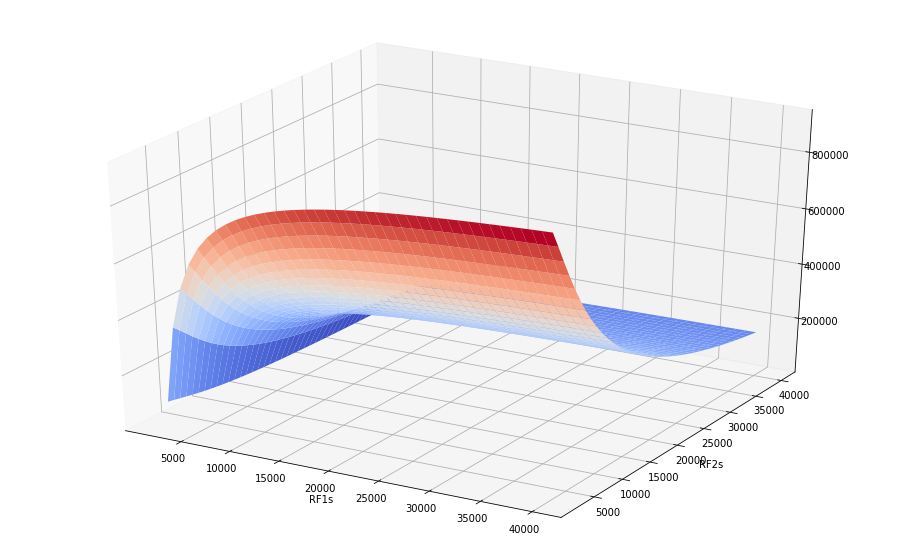

1.0760824853905017e-06
RF1 = 2000.0, RF2 = 40000.0


In [12]:
RG1 = 2e3
RG2 = 2e3

RF1s = np.linspace(2e3, 40e3, 40)
RF2s = np.linspace(2e3, 40e3, 40)

i, j = 0, 0
SNRs = [[0 for i in range(len(RF1s))] for j in range(len(RF2s))]
for RF1 in RF1s:
    for RF2 in RF2s:
        gain1 = 1+RF1/RG1
        gain2 = RF2/RG2
        signal = (5-4.5/gain2)/gain1
        SNRs[i][j] = 1/getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2)
        j+=1
    i+=1
    j=0
    
fig = plt.figure(figsize = (16,10))    
ax = fig.add_subplot(111, projection = '3d')
X, Y = np.meshgrid(RF1s, RF2s)
# Plot the surface.
surf = ax.plot_surface(X, Y, np.array(SNRs), cmap=cm.coolwarm)
ax.set_xlabel('RF1s')
ax.set_ylabel('RF2s')

plt.show()
print(1/np.max(SNRs))


from numpy import unravel_index
idx = unravel_index(np.array(SNRs).argmax(), np.array(SNRs).shape)
print('RF1 = '+str(RF1s[idx[0]])+', RF2 = '+str(RF2s[idx[1]]))

### Fix the input signal to be 0.35 V

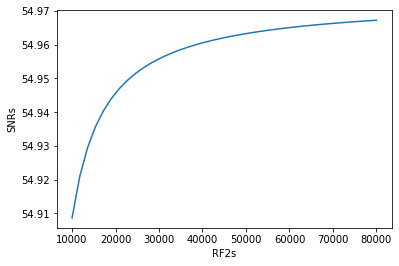

54.96718489702013


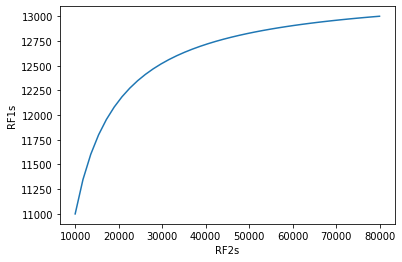

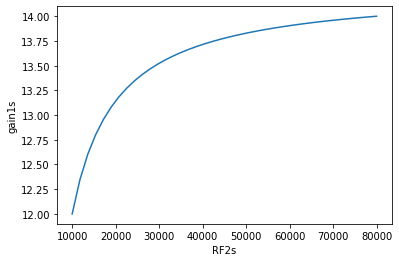

In [14]:
# Scan RF2s

signal = 0.35
RG1 = 1e3
RG2 = 2e3

RF2s = np.linspace(10e3, 80e3, 40)

SNRs = []
RF1s = []
gain1s = []

for RF2 in RF2s:
    gain2 = RF2/RG2
    gain1 = (5-4/gain2)/signal
    RF1 = (gain1-1)*RG1
    SNRs.append(getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2))
    RF1s.append(RF1)
    gain1s.append(gain1)
    
plt.plot(RF2s, SNRs)
plt.xlabel('RF2s')
plt.ylabel('SNRs')
plt.show()
print(max(SNRs))


plt.plot(RF2s, RF1s)
plt.xlabel('RF2s')
plt.ylabel('RF1s')
plt.show()

plt.plot(RF2s, gain1s)
plt.xlabel('RF2s')
plt.ylabel('gain1s')

plt.show()

### Fix the input signal to be 0.2203 V

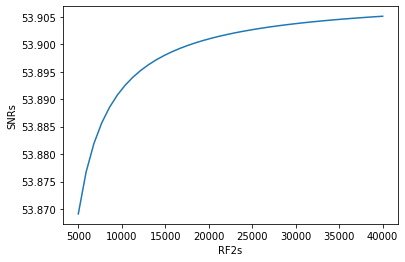

Max SNR is: 53.905101406733806 dB


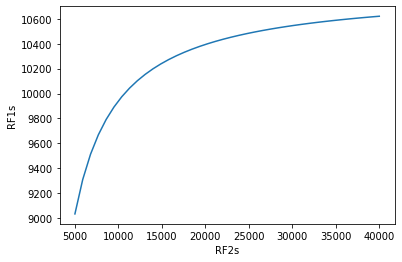

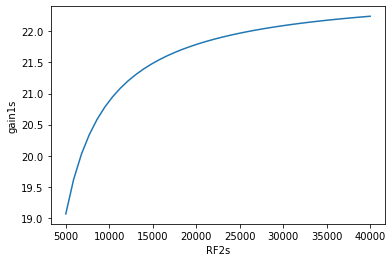

In [16]:
# Scan RF2s

signal = 0.2203
RG1 = 0.5e3
RG2 = 1e3

RF2s = np.linspace(5e3, 40e3, 40)

SNRs = []
RF1s = []
gain1s = []

for RF2 in RF2s:
    gain2 = RF2/RG2
    gain1 = (5-4/gain2)/signal
    RF1 = (gain1-1)*RG1
    SNRs.append(getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2))
    RF1s.append(RF1)
    gain1s.append(gain1)
    
plt.plot(RF2s, SNRs)
plt.xlabel('RF2s')
plt.ylabel('SNRs')
plt.show()
print('Max SNR is: '+str(np.max(SNRs))+' dB')


plt.plot(RF2s, RF1s)
plt.xlabel('RF2s')
plt.ylabel('RF1s')
plt.show()

plt.plot(RF2s, gain1s)
plt.xlabel('RF2s')
plt.ylabel('gain1s')

plt.show()

### Fix the input signal to be 0.01 V

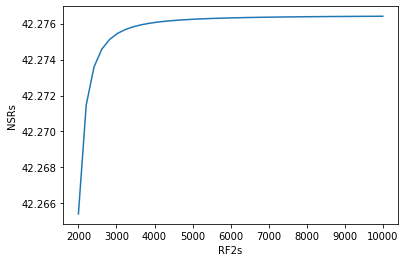

Max SNR is: 42.27641271377973 dBm


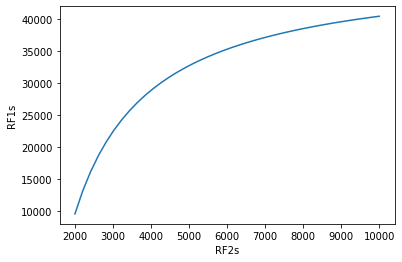

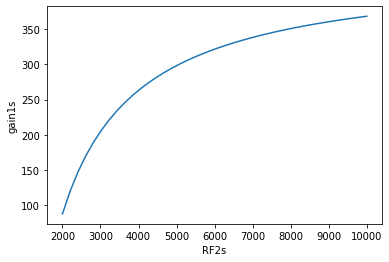

In [95]:
# Scan RF2s

signal = 0.0114
RG1 = 0.11e3
RG2 = 2e3

RF2s = np.linspace(2e3, 10e3, 40)

SNRs = []
RF1s = []
gain1s = []

for RF2 in RF2s:
    gain2 = RF2/RG2
    gain1 = (5-4/gain2)/signal
    RF1 = (gain1-1)*RG1
    SNRs.append(1/getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2))
    RF1s.append(RF1)
    gain1s.append(gain1)
    
NSRs = [-10*np.log10(1/SNR) for SNR in SNRs]    
plt.plot(RF2s, NSRs)
plt.xlabel('RF2s')
plt.ylabel('NSRs')
plt.show()
print('Max SNR is: '+str(-10*np.log10(1/np.max(SNRs)))+' dBm')


plt.plot(RF2s, RF1s)
plt.xlabel('RF2s')
plt.ylabel('RF1s')
plt.show()

plt.plot(RF2s, gain1s)
plt.xlabel('RF2s')
plt.ylabel('gain1s')

plt.show()

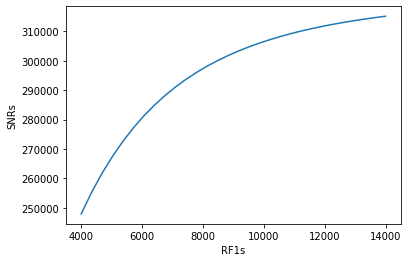

54.98521973855385


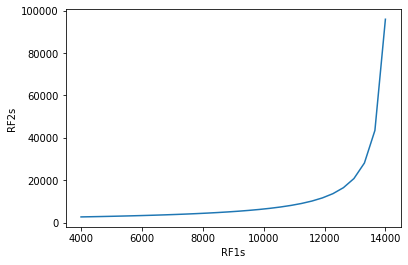

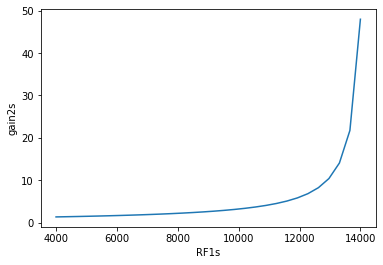

In [44]:
# Scan RF1s

signal = 0.35
RG1 = 1e3
RG2 = 2e3

RF1s = np.linspace(4e3, 14e3, 30)

SNRs = []
RF2s = []
gain2s = []

for RF1 in RF1s:
    gain1 = RF1/RG1
    gain2 = 4.8/(5-signal*gain1)
    RF2 = gain2*RG2
    SNRs.append(1/getNoise(signal = signal, RF1 = RF1, RG1 = RG1, RF2 = RF2, RG2 = RG2))
    RF2s.append(RF2)
    gain2s.append(gain2)
    
plt.plot(RF1s, SNRs)
plt.xlabel('RF1s')
plt.ylabel('SNRs')
plt.show()
print(-10*np.log10(1/np.max(SNRs)))


plt.plot(RF1s, RF2s)
plt.xlabel('RF1s')
plt.ylabel('RF2s')
plt.show()

plt.plot(RF1s, gain2s)
plt.xlabel('RF1s')
plt.ylabel('gain2s')
plt.show()

## Check the sensitivity of the input signal

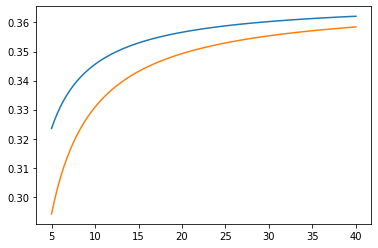

In [102]:
gain2s = np.linspace(5,40,101)
signal1s = []
signal2s = []
for gain2 in gain2s:
    gain1 = 13.6
    signal1s.append((5-3/gain2)/gain1) 
    signal2s.append((5-5/gain2)/gain1) 
plt.plot(gain2s, signal1s)   
plt.plot(gain2s, signal2s)   

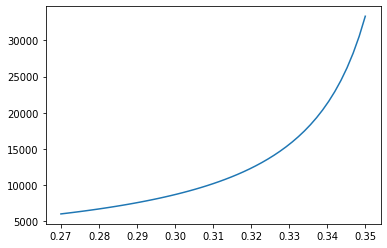

In [101]:
signals = np.linspace(0.27,0.35, 51)
gain1 = 13.6
RG1 = 0.8e3
RF1 = RG1*(gain1-1)
RG2 = 2e3
RF2s = []
for signal in signals:
    gain2 = 4/(5-signal*gain1)
    RF2s.append(RG2*gain2)
plt.plot(signals, RF2s)

In [103]:
RG1 = 0.8e3
RF1_low = RG1*(12.8-1)
RF1_high = RG1*(13.8-1)
RG2 = 2e3
RF2_low = 6000.0
RF2_high = 40000.0

print('Expected signal range: 0.27 ~ 0.35 V')
print('Needed RF1: '+str(RF1_low)+' ~ '+str(RF1_high)+' Ohm')
print(np.linspace(RF1_low,RF1_high,6))
print('Needed RG1: '+str(RG1)+' Ohm')
print('Needed RF2: '+str(RF2_low)+' ~ '+str(RF2_high)+' Ohm')
print(np.linspace(RF2_low,RF2_high,11))
print('Needed RG2: '+str(RG2)+' Ohm')


Expected signal range: 0.27 ~ 0.35 V
Needed RF1: 9440.0 ~ 10240.0 Ohm
[ 9440.  9600.  9760.  9920. 10080. 10240.]
Needed RG1: 800.0 Ohm
Needed RF2: 6000.0 ~ 40000.0 Ohm
[ 6000.  9400. 12800. 16200. 19600. 23000. 26400. 29800. 33200. 36600.
 40000.]
Needed RG2: 2000.0 Ohm


# Calulate the noise of testing ref chip circuit

In [141]:
ini = 2.5e-15
iii = 2.5e-15
RF = 10e6
RG = 10e3
RM = 9e3
gain2 = RF/RG

RS = 1e3
eni = 2.7e-9*np.sqrt(bandwidth)

NA1 = eni**2*(RG/RF + RG/(RG+RS*RM/(2*RS+2*RM)))**2
NA2 = ini**2*RG**2
NA3 = iii**2*RG**2
NA4 = 2*4*k*T*RG*(RG/(RG+RS*RM/(2*RS+2*RM)))**2*bandwidth
NA5 = 2*4*k*T*RF*(RG/RF)**2*bandwidth

num = 2*RS*RG/(RS+2*RG)
den = RM+2*RS*RG/(RS+2*RG)
NA6 = 4*k*T*RM*(num/den)**2*bandwidth
NA = NA1 + NA2 + NA3 + NA4 + NA5 + NA6 # Device input noise

input_noise = 0.027e-3
output_noise = np.sqrt((input_noise**2+0.027e-3**2+NA)*gain2)

print('rtN_input = '+str(input_noise)+' V')
print('rtN_refChip = '+str(0.027e-3)+' V')
print('rtNA1 = '+str(np.sqrt(NA1))+' V')
print('rtNA2 = '+str(np.sqrt(NA2))+' V')
print('rtNA3 = '+str(np.sqrt(NA3))+' V')
print('rtNA4 = '+str(np.sqrt(NA4))+' V')
print('rtNA5 = '+str(np.sqrt(NA5))+' V')
print('rtNA6 = '+str(np.sqrt(NA6))+' V')
print('Final output noise = '+str(output_noise)+' V')
print('Final output noise p-p = '+str(output_noise*6.6)+' V')
print('\n')

rtN_input = 2.7e-05 V
rtN_refChip = 2.7e-05 V
rtNA1 = 5.783437899567415e-07 V
rtNA2 = 2.5e-11 V
rtNA3 = 2.5e-11 V
rtNA4 = 3.895075663289062e-06 V
rtNA5 = 1.2871589738645338e-07 V
rtNA6 = 2.612896188185828e-07 V
Final output noise = 0.001213915539076142 V
Final output noise p-p = 0.008011842557902538 V




In [184]:
bandwidth = 50e3
enis = [1.5e-6*np.sqrt(bandwidth/10)/6.6, 2.7e-9*np.sqrt(bandwidth)]
ini = 2.5e-15
iii = 2.5e-15
RF = 240e3
RG = 20e3
RT = 1e6
gain1 = 1+RF/RG
RS = 50

#NI_noninv = 4*k*T*RS*(RT/(RS+RT))**2
NI_noninv = 1.8e-5**2
#NI_noninv = 0

cnt = 0
voltage_noise1 = []
for eni in enis:
    NA1 = eni**2
    NA2 = ini**2*(RS*RT/(RS+RT))**2
    NA3 = iii**2*(RF*RG/(RF+RG))**2
    NA4 = 4*k*T*RT*(RS/(RS+RT))**2*bandwidth
    NA5 = 4*k*T*RG*(RF/(RF+RG))**2*bandwidth
    NA6 = 4*k*T*RF*(RG/(RF+RG))**2*bandwidth
    NA_noninv = NA1 + NA2 + NA3 + NA4 + NA5 + NA6
    voltage_noise1.append(np.sqrt(NI_noninv+NA_noninv)*gain1) # Device input noise
    if cnt == 0:
        print('Before changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
        print('\n')
    else:
        print('After changing opamp')
        print('NI = '+str(np.sqrt(NI_noninv))+' V')
        print('rtNA1 = '+str(np.sqrt(NA1))+' V')
        print('rtNA2 = '+str(np.sqrt(NA2))+' V')
        print('rtNA3 = '+str(np.sqrt(NA3))+' V')
        print('rtNA4 = '+str(np.sqrt(NA4))+' V')
        print('rtNA5 = '+str(np.sqrt(NA5))+' V')
        print('rtNA6 = '+str(np.sqrt(NA6))+' V')
        print('Device input noise = '+str(np.sqrt(NI_noninv))+' V')
        print('First opamp output noise = '+str(voltage_noise1[cnt])+' V')
    cnt+=1

Before changing opamp
NI = 1.8e-05 V
rtNA1 = 1.6070608663330627e-05 V
rtNA2 = 1.2499375031248436e-13 V
rtNA3 = 4.615384615384615e-11 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 3.7572499090496034e-06 V
rtNA6 = 1.0846246232012428e-06 V
Device input noise = 1.8e-05 V
First opamp output noise = 0.0003177849407927246 V


After changing opamp
NI = 1.8e-05 V
rtNA1 = 6.037383539249433e-07 V
rtNA2 = 1.2499375031248436e-13 V
rtNA3 = 4.615384615384615e-11 V
rtNA4 = 1.43901553092844e-09 V
rtNA5 = 3.7572499090496034e-06 V
rtNA6 = 1.0846246232012428e-06 V
Device input noise = 1.8e-05 V
First opamp output noise = 0.00023958750985758712 V


# Inverting opamps

In [22]:
eni = 1.65e-9
ini = 13.5e-12
iii = 20e-12
RF = 255
RG = 49.9
RM = 1e6

NI = 4*k*T*RS*(RM*RG/(RS*(RM+RG)+RM*RG))**2

NA1 = eni**2*(RG/RF + RG/(RG+RS*RM/(RS+RM)))**2
NA2 = ini**2*(RT*RG/RF + RT*RG/(RG+RS*RM/(RS+RM)))**2
NA3 = iii**2*RG**2
NA4 = 4*k*T*RT*(RG/RF + RG/(RG+RS*RM/(RS+RM)))**2
NA5 = 4*k*T*RG*(RG/(RG+RS*RM/(RS+RM)))**2
NA6 = 4*k*T*RF*(RG/RF)**2
NA7 = 4*k*T*RM*(RS*RG/(RM*(RS+RG)+RS*RG))**2
NA = NA1 + NA2 + NA3 + NA4 + NA5 + NA6 + NA7

print('NF = '+str(NF(NI,NA)))
print('NI = '+str(NI))
print('NA1 = '+str(NA1))
print('NA2 = '+str(NA2))
print('NA3 = '+str(NA3))
print('NA4 = '+str(NA4))
print('NA5 = '+str(NA5))
print('NA6 = '+str(NA6))
print('NA7 = '+str(NA7))

NF = 12.298527494267724
NI = 2.066727703441055e-19
NA1 = 1.3176811508852121e-18
NA2 = 2.196398170609675e-19
NA3 = 9.96004e-19
NA4 = 4.0013576236693357e-19
NA5 = 2.0669339680120309e-19
NA6 = 1.6178017041342113e-19
NA7 = 1.031297124017086e-23


In [30]:
0.22/(4.4e-6)/(4/1.44e-4)

1.8

In [28]:
(4/1.44e-4)

27777.777777777777

In [91]:
2.5/219.19

0.011405629818878599